# 주제 : <br>안녕하세요 고객님 좋은 상품 있어 연락드렸습니다. - 부채 고객을 개인 대출 고객으로 전환하기 위한 최소한의 예산으로 마케팅
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
 
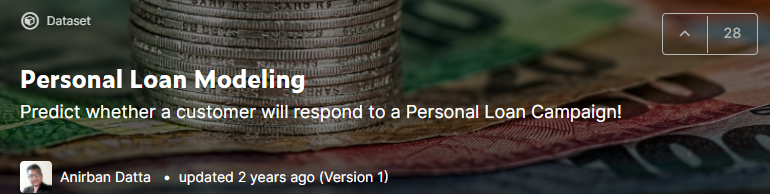
- 데이터 출처: https://www.kaggle.com/teertha/personal-loan-modeling

    
## 데이터 소개
    - 이번 주제는 Personal Loan Modeling 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Bank_Personal_Loan_Modelling.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    ID: 고객 ID
    Age: 고객 나이
    Experience: 직장근무년수
    Income: 연봉($000)
    ZIP Code: 우편번호
    Family: 가족수
    CCAvg: 월평균 신용카드 사용금액($000)
    Education: 최종학력(1: Undergrad; 2: Graduate; 3: Advanced/Professional)
    Mortgage: 주택 담보 대출의 가치($000)
    Personal Loan: 개인 대출 수락 여부
    Securities_Account: 증권 계좌 유/무
    CD Account: 양도성예금증서 소유 유/무
    Online: 인터넷 뱅킹 사용 유/무
    CreditCard:  다른 은행에서 발급한 신용카드를 사용 유/무


        
    
    
## 최종 목표
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 분류 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득
---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

### Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'dpyang22'
os.environ['KAGGLE_KEY'] = '1ae23befe07729025461c9680ceb1f97'

### 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d teertha/personal-loan-modeling
!unzip '*.zip'

  0% 0.00/60.6k [00:00<?, ?B/s]
100% 60.6k/60.6k [00:00<00:00, 29.5MB/s]
Archive:  personal-loan-modeling.zip
  inflating: Bank_Personal_Loan_Modelling.csv  


### Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Step 2. EDA 및 데이터 기초 통계 분석


### 데이터프레임의 각 컬럼 분석하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df['Personal Loan'] = df['Personal Loan'].map({0:'No', 1:'Yes'})

### Countplot을 이용하여 범주별 통계 확인하기

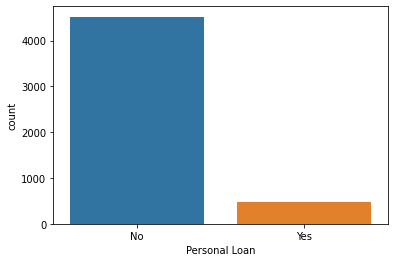

In [ ]:
sns.countplot(x='Personal Loan', data=df)

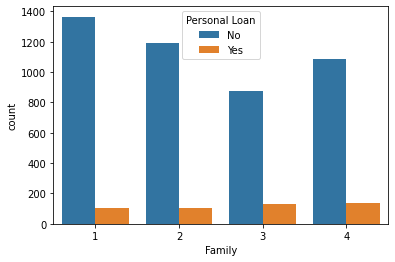

In [ ]:
sns.countplot(x='Family', data=df, 
              hue='Personal Loan')

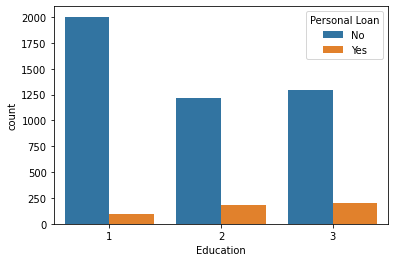

In [ ]:
sns.countplot(x='Education', data=df, 
              hue='Personal Loan')

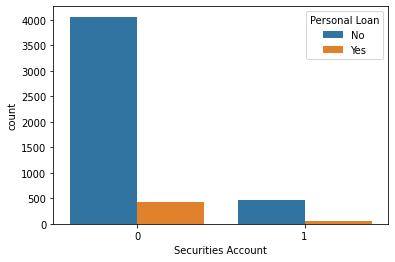

In [ ]:
sns.countplot(x='Securities Account', data=df, hue='Personal Loan')

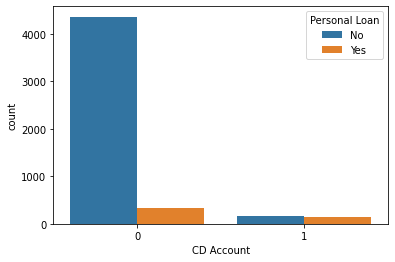

In [ ]:
sns.countplot(x='CD Account', data=df, hue='Personal Loan')

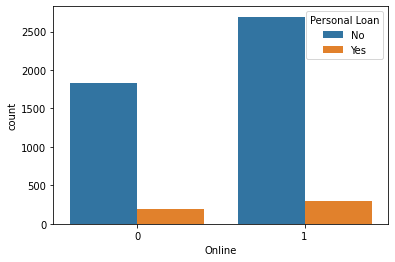

In [ ]:
sns.countplot(x='Online', data=df, hue='Personal Loan')

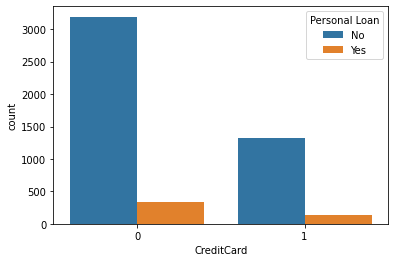

In [ ]:
sns.countplot(x='CreditCard', data=df, hue='Personal Loan')

In [ ]:
df.groupby(['Education']).mean()['Income']

Education
1    85.586355
2    64.313614
3    66.122585
Name: Income, dtype: float64

### 수치형 데이터의 히스토그램 그리기

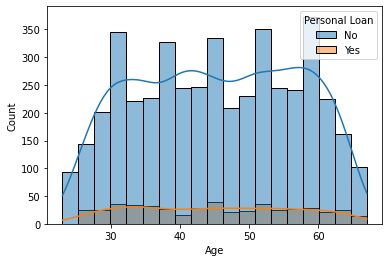

In [ ]:
sns.histplot(x='Age', data=df, 
             hue='Personal Loan', kde='True')

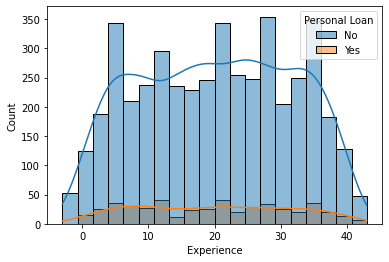

In [ ]:
sns.histplot(x='Experience', data=df, hue='Personal Loan', kde='True')

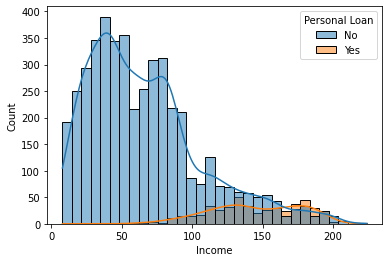

In [ ]:
sns.histplot(x='Income', data=df, hue='Personal Loan', kde='True')

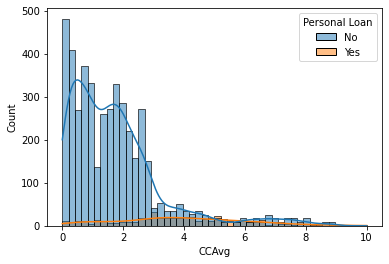

In [ ]:
sns.histplot(x='CCAvg', data=df, hue='Personal Loan', kde='True')

In [ ]:
print(df['CCAvg'].quantile(0.95))
print(df['CCAvg'].quantile(0.05))

6.0
0.1


In [8]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기
CC1 = df['CCAvg'].quantile(0.95)
CC2 = df['CCAvg'].quantile(0.05)
df = df[(df['CCAvg'] < CC1) & (df['CCAvg'] > CC2)]

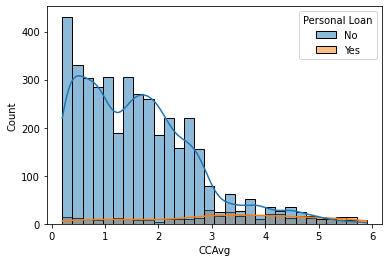

In [9]:
sns.histplot(x='CCAvg', data=df, hue='Personal Loan', kde='True')

------

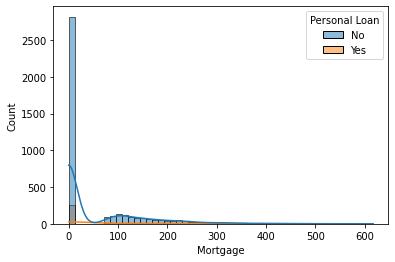

In [ ]:
sns.histplot(x='Mortgage', data=df, hue='Personal Loan', kde='True')

In [ ]:
print(df['Mortgage'].quantile(0.95))

260.0


In [10]:
Mor1 = df['Mortgage'].quantile(0.95)
df = df[(df['Mortgage'] < Mor1)]

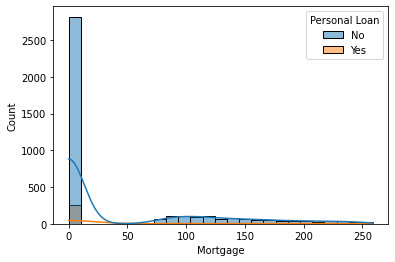

In [ ]:
sns.histplot(x='Mortgage', data=df, hue='Personal Loan', kde='True')

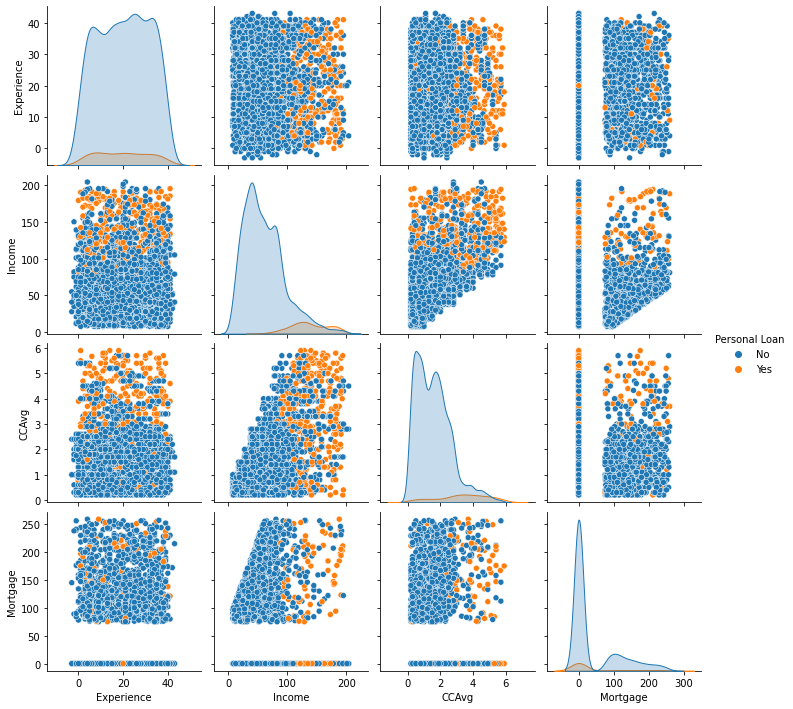

In [ ]:
sns.pairplot(df, x_vars=['Experience', 'Income', 'CCAvg', 'Mortgage'], 
             y_vars=['Experience', 'Income', 'CCAvg', 'Mortgage'], hue='Personal Loan')

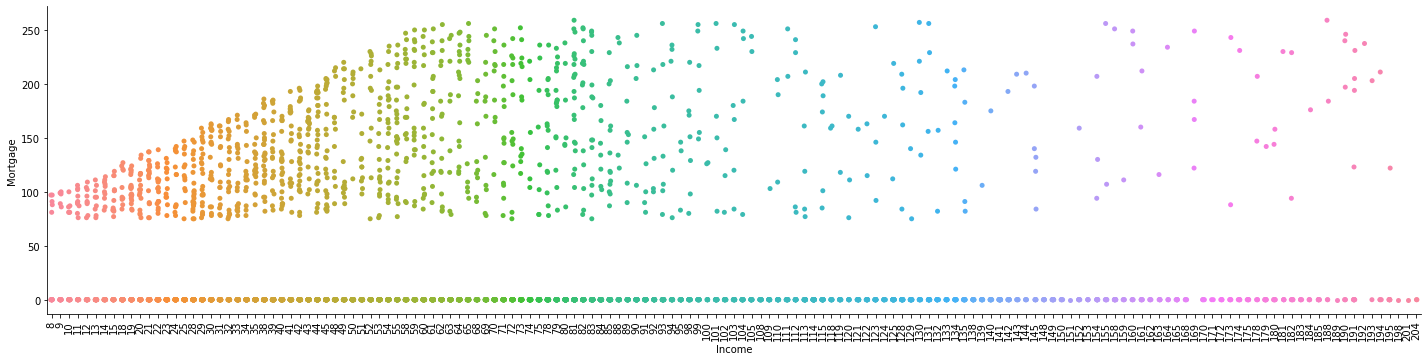

In [ ]:
sns.catplot(x='Income', y='Mortgage', data=df, aspect=4) # 너비를 인치 단위
plt.xticks(rotation=90)
plt.show()

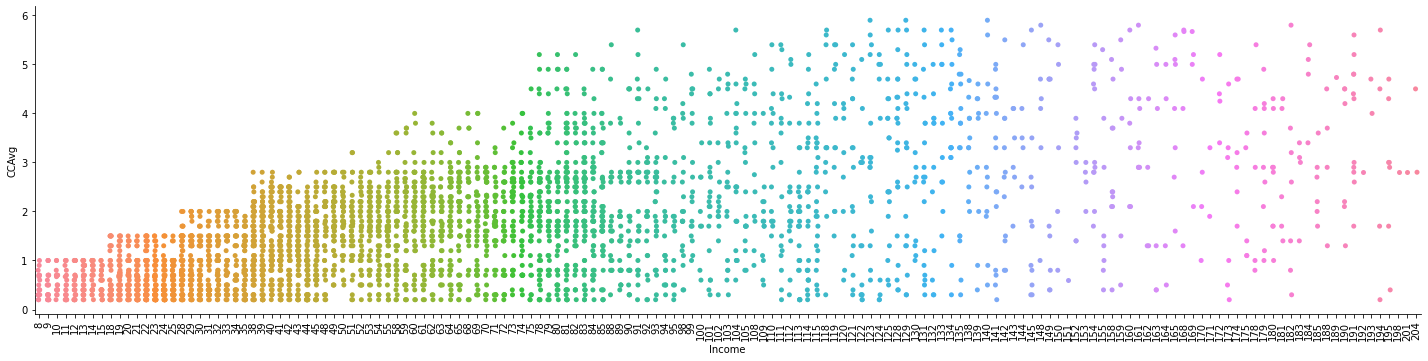

In [ ]:
sns.catplot(x='Income', y='CCAvg', data=df, aspect=4) # 너비를 인치 단위
plt.xticks(rotation=90)
plt.show()

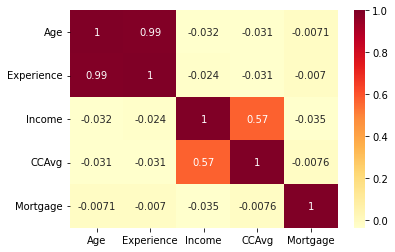

In [ ]:
sns.heatmap(df[['Age','Experience', 'Income', 'CCAvg', 'Mortgage']].corr(), 
            annot=True, cmap='YlOrRd')

## Step 3. 모델 학습을 위한 데이터 전처리


### 사용하지 않는 특성 삭제

In [11]:
dict(No = 0, Yes = 1)

{'No': 0, 'Yes': 1}

In [12]:
df['Personal Loan'] = df['Personal Loan'].map({'No': 0, 'Yes': 1})
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
df.drop(['ID', 'ZIP Code', 'Experience'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


### get_dummies()를 이용하여 범주형 데이터 전처리하기
'Securities Account', 'CD Account', 'Online', 'CreditCard'는 이진 분류기 때문에 원 핫 인코딩을 하지 않아도 된다.


In [14]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [15]:
X_cat = df['Education']
X_cat = pd.get_dummies(X_cat, prefix='Education')
X_cat.head()

,Education_1,Education_2,Education_3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


### StandardScaler를 이용해 수치형 데이터 표준화하기

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = df[['Age', 'Income', 'Family', 'CCAvg', 'Mortgage']]
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled.head()

,Age,Income,Family,CCAvg,Mortgage
0,-1.776899,-0.443698,1.342131,-0.094657,-0.56668
1,-0.035003,-0.815310,0.480979,-0.177246,-0.56668
2,-0.557572,-1.385116,-1.241323,-0.590192,-0.56668
3,-0.905951,0.819784,-1.241323,0.813825,-0.56668
4,-0.905951,-0.542795,1.342131,-0.590192,-0.56668


### 학습데이터와 테스트데이터 분리하기


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
cat_lst = ['Securities Account', 'CD Account', 'Online', 'CreditCard']
X = pd.concat([X_scaled, X_cat, df[cat_lst]], axis=1)
y = df['Personal Loan']

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4220 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4220 non-null   float64
 1   Income              4220 non-null   float64
 2   Family              4220 non-null   float64
 3   CCAvg               4220 non-null   float64
 4   Mortgage            4220 non-null   float64
 5   Education_1         4220 non-null   uint8  
 6   Education_2         4220 non-null   uint8  
 7   Education_3         4220 non-null   uint8  
 8   Securities Account  4220 non-null   int64  
 9   CD Account          4220 non-null   int64  
 10  Online              4220 non-null   int64  
 11  CreditCard          4220 non-null   int64  
dtypes: float64(5), int64(4), uint8(3)
memory usage: 342.1 KB


In [20]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
print(X_train.shape)
print(X_test.shape)

(2954, 12)
(1266, 12)


In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.3)


In [24]:
print(X_train.shape)
print(X_val.shape)

(2067, 12)
(887, 12)


In [147]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid')) # 회귀모델 "",linear 2진분류 sigmoid 다중분류 softmax

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

  return model

In [148]:
model = get_model()
history = model.fit(X_train, y_train,
                    shuffle = True,
                    verbose = 1,
                    epochs =50,
                    validation_data = (X_val, y_val))
model.evaluate(X_test, y_test)

Epoch 1/50
65/65 [==============================] - 2s 14ms/step - loss: 0.3940 - acc: 0.8553 - val_loss: 0.2169 - val_acc: 0.9177
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.1837 - acc: 0.9337 - val_loss: 0.1415 - val_acc: 0.9459
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.1370 - acc: 0.9516 - val_loss: 0.1092 - val_acc: 0.9729
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.1141 - acc: 0.9603 - val_loss: 0.0916 - val_acc: 0.9763
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.1002 - acc: 0.9642 - val_loss: 0.0819 - val_acc: 0.9786
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0920 - acc: 0.9652 - val_loss: 0.0777 - val_acc: 0.9763
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0866 - acc: 0.9676 - val_loss: 0.0728 - val_acc: 0.9763
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0821 - acc: 0.9

[0.04305732250213623, 0.9881516695022583]

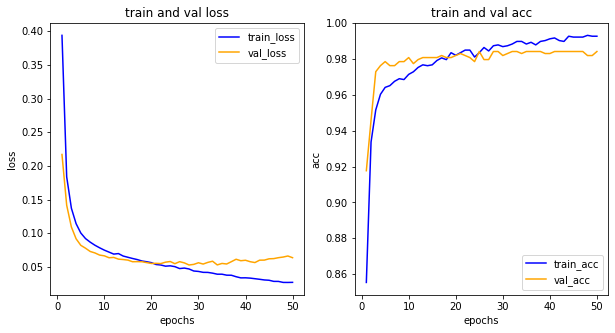

In [149]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

In [150]:
model.evaluate(X_test, y_test)

40/40 [==============================] - 0s 1ms/step - loss: 0.0431 - acc: 0.9882


[0.04305732250213623, 0.9881516695022583]

In [151]:
y_hat = model.predict(X_test)

In [152]:
from sklearn.metrics import classification_report, confusion_matrix
#threshold

for i in range(1,10):
  threshold = i/10
  y_hat[0] >= threshold
  result=[]
  for i in y_hat:
    if i >= threshold:
      result.append(1)
    else:
      result.append(0)
  print(f'############## Threshold가 {threshold} ###################### \n',
  classification_report(y_test,result),
  '\t오차행렬\n',
  confusion_matrix(y_test, result),'\n\n')


############## Threshold가 0.1 ###################### 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1181
           1       0.59      0.96      0.73        85

    accuracy                           0.95      1266
   macro avg       0.79      0.96      0.85      1266
weighted avg       0.97      0.95      0.96      1266
 	오차행렬
 [[1124   57]
 [   3   82]] 


############## Threshold가 0.2 ###################### 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1181
           1       0.69      0.96      0.81        85

    accuracy                           0.97      1266
   macro avg       0.85      0.97      0.90      1266
weighted avg       0.98      0.97      0.97      1266
 	오차행렬
 [[1145   36]
 [   3   82]] 


############## Threshold가 0.3 ###################### 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      118